In [1]:
import random
from math import *
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from statsmodels.tools.eval_measures import rmse

from sklearn import datasets

In [24]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\iris.csv"

In [25]:
# load the training data from iris.txt
df_training = pd.read_csv(location )

In [26]:
df_training.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [27]:
# copy the predictor variables into X and responses in y
X_df = df_training[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
y_df = df_training['class']

In [28]:
type(X_df)

pandas.core.frame.DataFrame

In [29]:
X = X_df.values
y = y_df.values

In [30]:
type(X)

numpy.ndarray

# K-Fold 

- KFold divides all the samples in  groups of samples, called folds of equal sizes (if possible). 

- The prediction function is learned using (K - 1) folds, and the fold left out is used for test.

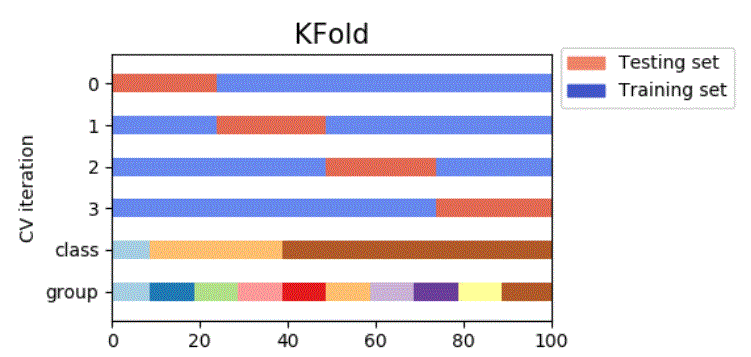

In [33]:
kf = KFold(n_splits=3, random_state=100)

In [20]:


for train_idx, test_idx in kf.split(df_training):
    print(train_idx)
    print(test_idx)
    print('\n')

[ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
[50 51 52 53 54 55 56 57 58 59

In [34]:
#### Using KFold
# instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)

kf_results =  cross_val_score(estimator=knn, X=X, y=y, cv=kf, scoring='accuracy')

print('K-Fold accuracy scores : \n', kf_results)
print('Mean score : \n', kf_results.mean())

K-Fold accuracy scores : 
 [0. 0. 0.]
Mean score : 
 0.0


# Repeated K-Fold

RepeatedKFold repeats K-Fold n times. It can be used when one requires to run KFold n times, producing different splits in each repetition.

In [35]:
random_state = 100
rkf = RepeatedKFold(n_splits=3, n_repeats=2, random_state=random_state)

for train_idx, test_idx in rkf.split(df_training):
    print(train_idx)
    print(test_idx)
    print('\n')

[  0   2   3   4   5   7   8  10  13  14  17  18  19  22  23  24  27  30
  33  34  35  36  38  39  42  43  44  47  48  49  50  52  53  54  55  56
  57  58  59  60  61  63  64  65  66  67  68  70  71  72  74  76  78  79
  80  82  83  84  85  86  87  88  91  93  94  95  96  98 100 101 103 104
 105 106 107 108 110 111 113 117 121 124 126 127 129 130 131 132 133 134
 137 138 139 140 141 142 143 144 147 148]
[  1   6   9  11  12  15  16  20  21  25  26  28  29  31  32  37  40  41
  45  46  51  62  69  73  75  77  81  89  90  92  97  99 102 109 112 114
 115 116 118 119 120 122 123 125 128 135 136 145 146 149]


[  1   2   4   6   7   8   9  11  12  14  15  16  19  20  21  24  25  26
  27  28  29  30  31  32  34  37  38  39  40  41  44  45  46  47  48  49
  51  53  55  56  58  59  60  61  62  63  65  66  67  69  71  73  75  77
  79  80  81  86  87  89  90  91  92  93  94  97  98  99 100 102 103 105
 107 108 109 112 114 115 116 118 119 120 121 122 123 125 128 130 135 136
 138 140 141 142 143 1

In [36]:
#### Using rKFold
# instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)

kf_results =  cross_val_score(estimator=knn, X=X, y=y, cv=rkf, scoring='accuracy')

print('K-Fold accuracy scores : \n', kf_results)
print('Mean score : \n', kf_results.mean())

K-Fold accuracy scores : 
 [0.98 0.9  1.   0.94 0.94 0.98]
Mean score : 
 0.9566666666666667


# Leave One Out (LOO)

- LeaveOneOut (or LOO) is a simple cross-validation. 
- Each learning set is created by taking all the samples except one, the test set being the sample left out. 
- Thus, for n samples, we have n different training sets and n different tests set. 

- This cross-validation procedure does not waste much data as only one sample is removed from the training set:

In [37]:
random_state = 100
loocv = LeaveOneOut()

# for train_idx, test_idx in loocv.split(df_training):
#     print(train_idx)
#     print(test_idx)
#     print('\n')

In [38]:
#### Using loocv
# instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)

kf_results =  cross_val_score(estimator=knn, X=X, y=y, cv=loocv, scoring='accuracy')

print('LOOCV accuracy scores : \n', kf_results)
print('Mean score : \n', kf_results.mean())

LOOCV accuracy scores : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Mean score : 
 0.96


# Leave P Out (LPO)

LeavePOut is very similar to LeaveOneOut as it creates all the possible training/test sets by removing p  samples from the complete set. 

For n samples, this produces $n \choose p$ train-test pairs. Unlike LeaveOneOut and KFold, the test sets will overlap for  p > 1

In [1]:
#lpo = LeavePOut(p=20)

# for train_idx, test_idx in lpo.split(df_training):
#     print(train_idx)
#     print(test_idx)


#### Stratified K-Folds cross-validator
 Provides train/test indices to split data in train/test sets.

 Parameters:
 n_splits : int, default=3
            Number of folds. Must be at least 2.

 shuffle  : boolean, optional
            Whether to shuffle each stratification of the data before 
            splitting into batches.

 random_state : int, RandomState instance or None, optional, default=None

                If int, random_state is the seed used by the random number 
                generator; 
                If RandomState instance, random_state is the random number 
                generator; 
                if None, the random number generator is the RandomState 
                instance used by np.random. Used when shuffle == True.

In [39]:
skf = StratifiedKFold(n_splits=10, random_state=None)
kf  = KFold(n_splits=10, random_state=None)
#skf = StratifiedKFold(10,  random_state=None)

In [40]:
# instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)

# weights : {'uniform', 'distance'}
# metric  : {’minkowski’ 'euclidean', 'manhattan', 'mahalanobis'}

# knn = KNeighborsClassifier(n_neighbors=5, 
#                            weights=’uniform’, 
#                            p=2, 
#                            metric=’minkowski’, 
#                            n_jobs=1)

# Scoring	Function
# ‘accuracy’	         sklearn.metrics.accuracy_score
# ‘average_precision’	 sklearn.metrics.average_precision_score
# ‘f1’	                 sklearn.metrics.f1_score
# ‘precision’	         sklearn.metrics.precision_score
# ‘recall’	             sklearn.metrics.recall_score
# ‘roc_auc’	             sklearn.metrics.roc_auc_score
# ['accuracy', 'adjusted_rand_score', 'average_precision', 
#  'f1', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 
#  'precision', 'r2', 'recall', 'roc_auc']

skf_results =  cross_val_score(estimator=knn, X=X, y=y, cv=skf, scoring='accuracy')

print('Stratified K-Fold accuracy scores : \n', skf_results)
print('Mean score : \n', skf_results.mean())

Stratified K-Fold accuracy scores : 
 [1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ]
Mean score : 
 0.9666666666666666


In [41]:
#### Using KFold
# instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)

kf_results =  cross_val_score(estimator=knn, X=X, y=y, cv=skf, scoring='accuracy')

print('K-Fold accuracy scores : \n', kf_results)
print('Mean score : \n', kf_results.mean())

K-Fold accuracy scores : 
 [1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ]
Mean score : 
 0.9666666666666666


In [25]:
kf_results.

# sklearn.model_selection.ShuffleSplit

Parameters:	
n_splits : int, default 10
Number of re-shuffling & splitting iterations.

test_size : float, int, None, default=0.1
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. By default (the parameter is unspecified), the value is set to 0.1. The default will change in version 0.21. It will remain 0.1 only if train_size is unspecified, otherwise it will complement the specified train_size.

train_size : float, int, or None, default=None
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

random_state : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

In [2]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6]])
y = np.array([1, 2, 1, 2, 1, 2])


In [5]:
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)

#rs.get_n_splits(X)
for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1 3 0 4] TEST: [5 2]
TRAIN: [4 0 2 5] TEST: [1 3]
TRAIN: [1 2 4 0] TEST: [3 5]
TRAIN: [3 4 1 0] TEST: [5 2]
TRAIN: [3 5 1 0] TEST: [2 4]


In [9]:
rs = ShuffleSplit(n_splits=5, train_size=0.5, test_size=.2, random_state=0)

for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1 3 0] TEST: [5 2]
TRAIN: [4 0 2] TEST: [1 3]
TRAIN: [1 2 4] TEST: [3 5]
TRAIN: [3 4 1] TEST: [5 2]
TRAIN: [3 5 1] TEST: [2 4]


#### Stop here

In [10]:
from sklearn.model_selection import cross_validate

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}

scores = cross_validate(knn, X, y, scoring=scoring, cv=5, return_train_score=True)

print('Score keys : \n', scores.keys())
print(scores['test_acc'])  

Score keys : 
 dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec_macro', 'train_prec_macro', 'test_rec_micro', 'train_rec_micro'])
[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
